In [1]:
#modwt code from https://github.com/pistonly/modwtpy
#An improved wavelet–ARIMA approach for forecasting metal prices
#file:///Users/andyliu/Downloads/Resources%20Policy%20Volume%2039%20issue%202014%20[doi%2010.1016_j.resourpol.2013.10.005]%20Kriechbaumer,%20Thomas%3B%20Angus,%20Andrew%3B%20Parsons,%20David%3B%20Rivas%20Casad%20--%20An%20improved%20wavelet%E2%80%93ARIMA%20approach%20for%20forecasting%20met.pdf#page=4&zoom=100,0,0

In [1]:
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from modwt import modwt, modwtmra
from sklearn import preprocessing

In [2]:
df = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [3]:
data = df['close']

In [4]:
#df = pd.read_csv('/Users/andyliu/Downloads/aapl_2000-2020.csv')

In [5]:
#df1 = df.drop(['item_id', 'timestamp'], axis=1)
#data = df1.values[1000000:1001000]

In [6]:
train_n = data.shape[0]*4//5
train = np.array(data[:train_n])
test = np.array(data[train_n:])

In [7]:
test_n = data.shape[0]//5

In [8]:
#test = pywt.Wavelet('haar')
#test.dec_hi

In [9]:
wt = modwt(data, 'db2', 6)
c = modwtmra(wt, 'db2')

In [10]:
detail = c[:6]
smooth = c[6]

In [11]:
smooth_test = smooth[train_n:]
smooth_train = smooth[:train_n]
detail_train = []
detail_test = []
for i in range(len(detail)):
    detail_train.append(detail[i][:train_n])
    detail_test.append(detail[i][train_n:])

In [12]:
len(detail_test[1])

1016

In [55]:
#generate smooth, detail

TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
def arima_train(train, test, trainorder):
    lent = len(test)
    history = [x for x in train]
    predictions = []
    for t in range(lent):
        print(str(t+1) + "/" + str(lent))
        model = ARIMA(history, order=trainorder)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return(predictions)

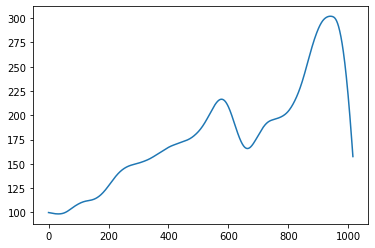

In [15]:
plt.plot(smooth_test)

In [17]:
pred_smooth = arima_train(smooth_train, smooth_test, (10,1,1))

1/1016


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: Co

2/1016


KeyboardInterrupt: 

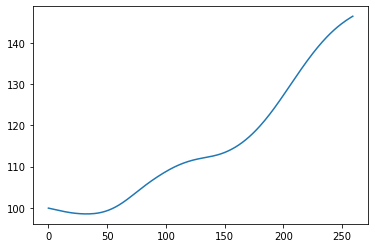

In [82]:
plt.plot(pred_smooth)

In [83]:
prediction_detail = []
for i in range(len(detail_train)):
    pred_d = arima_train(detail_train[i], detail_test[i], (1,1,0))
    prediction_detail.append(pred_d)

1/260
2/260
3/260
4/260
5/260
6/260
7/260
8/260
9/260
10/260
11/260
12/260
13/260
14/260
15/260
16/260
17/260
18/260
19/260
20/260
21/260
22/260
23/260
24/260
25/260
26/260
27/260
28/260
29/260
30/260
31/260
32/260
33/260
34/260
35/260
36/260
37/260
38/260
39/260
40/260
41/260
42/260
43/260
44/260
45/260
46/260
47/260
48/260
49/260
50/260
51/260
52/260
53/260
54/260
55/260
56/260
57/260
58/260
59/260
60/260
61/260
62/260
63/260
64/260
65/260
66/260
67/260
68/260
69/260
70/260
71/260
72/260
73/260
74/260
75/260
76/260
77/260
78/260
79/260
80/260
81/260
82/260
83/260
84/260
85/260
86/260
87/260
88/260
89/260
90/260
91/260
92/260
93/260
94/260
95/260
96/260
97/260
98/260
99/260
100/260
101/260
102/260
103/260
104/260
105/260
106/260
107/260
108/260
109/260
110/260
111/260
112/260
113/260
114/260
115/260
116/260
117/260
118/260
119/260
120/260
121/260
122/260
123/260
124/260
125/260
126/260
127/260
128/260
129/260
130/260
131/260
132/260
133/260
134/260
135/260
136/260
137/260
138/260
139/

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


203/260
204/260
205/260
206/260
207/260
208/260
209/260
210/260
211/260
212/260
213/260
214/260
215/260
216/260
217/260
218/260
219/260
220/260
221/260
222/260
223/260
224/260
225/260
226/260
227/260
228/260
229/260
230/260
231/260
232/260
233/260
234/260
235/260
236/260
237/260
238/260
239/260
240/260
241/260
242/260
243/260
244/260
245/260
246/260
247/260
248/260
249/260
250/260
251/260
252/260
253/260
254/260
255/260
256/260
257/260
258/260
259/260
260/260
1/260
2/260
3/260
4/260
5/260
6/260
7/260
8/260
9/260
10/260
11/260
12/260
13/260
14/260
15/260
16/260
17/260
18/260
19/260
20/260
21/260
22/260
23/260
24/260
25/260
26/260
27/260
28/260
29/260
30/260
31/260
32/260
33/260
34/260
35/260
36/260
37/260
38/260
39/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


40/260
41/260
42/260
43/260
44/260
45/260
46/260
47/260
48/260
49/260
50/260
51/260
52/260
53/260
54/260
55/260
56/260
57/260
58/260
59/260
60/260
61/260
62/260
63/260
64/260
65/260
66/260
67/260
68/260
69/260
70/260
71/260
72/260
73/260
74/260
75/260
76/260
77/260
78/260
79/260
80/260
81/260
82/260
83/260
84/260
85/260
86/260
87/260
88/260
89/260
90/260
91/260
92/260
93/260
94/260
95/260
96/260
97/260
98/260
99/260
100/260
101/260
102/260
103/260
104/260
105/260
106/260
107/260
108/260
109/260
110/260
111/260
112/260
113/260
114/260
115/260
116/260
117/260
118/260
119/260
120/260
121/260
122/260
123/260
124/260
125/260
126/260
127/260
128/260
129/260
130/260
131/260
132/260
133/260
134/260
135/260
136/260
137/260
138/260
139/260
140/260
141/260
142/260
143/260
144/260
145/260
146/260
147/260
148/260
149/260
150/260
151/260
152/260
153/260
154/260
155/260
156/260
157/260
158/260
159/260
160/260
161/260
162/260
163/260
164/260
165/260
166/260
167/260
168/260
169/260
170/260
171/260
172/

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


254/260
255/260
256/260
257/260
258/260
259/260
260/260
1/260
2/260
3/260
4/260
5/260
6/260
7/260
8/260
9/260
10/260
11/260
12/260
13/260
14/260
15/260
16/260
17/260
18/260
19/260
20/260
21/260
22/260
23/260
24/260
25/260
26/260
27/260
28/260
29/260
30/260
31/260
32/260
33/260
34/260
35/260
36/260
37/260
38/260
39/260
40/260
41/260
42/260
43/260
44/260
45/260
46/260
47/260
48/260
49/260
50/260
51/260
52/260
53/260
54/260
55/260
56/260
57/260
58/260
59/260
60/260
61/260
62/260
63/260
64/260
65/260
66/260
67/260
68/260
69/260
70/260
71/260
72/260
73/260
74/260
75/260
76/260
77/260
78/260
79/260
80/260
81/260
82/260
83/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


84/260
85/260
86/260
87/260
88/260
89/260
90/260
91/260
92/260
93/260
94/260
95/260
96/260
97/260
98/260
99/260
100/260
101/260
102/260
103/260
104/260
105/260
106/260
107/260
108/260
109/260
110/260
111/260
112/260
113/260
114/260
115/260
116/260
117/260
118/260
119/260
120/260
121/260
122/260
123/260
124/260
125/260
126/260
127/260
128/260
129/260
130/260
131/260
132/260
133/260
134/260
135/260
136/260
137/260
138/260
139/260
140/260
141/260
142/260
143/260
144/260
145/260
146/260
147/260
148/260
149/260
150/260
151/260
152/260
153/260
154/260
155/260
156/260
157/260
158/260
159/260
160/260
161/260
162/260
163/260
164/260
165/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


166/260
167/260
168/260
169/260
170/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


171/260
172/260
173/260
174/260
175/260
176/260
177/260
178/260
179/260
180/260
181/260
182/260
183/260
184/260
185/260
186/260
187/260
188/260
189/260
190/260
191/260
192/260
193/260
194/260
195/260
196/260
197/260
198/260
199/260
200/260
201/260
202/260
203/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


204/260
205/260
206/260
207/260
208/260
209/260
210/260
211/260
212/260
213/260
214/260
215/260
216/260
217/260
218/260
219/260
220/260
221/260
222/260
223/260
224/260
225/260
226/260
227/260
228/260
229/260
230/260
231/260
232/260
233/260
234/260
235/260
236/260
237/260
238/260
239/260
240/260
241/260
242/260
243/260
244/260
245/260
246/260
247/260
248/260
249/260
250/260
251/260
252/260
253/260
254/260
255/260
256/260
257/260
258/260
259/260
260/260
1/260
2/260
3/260
4/260
5/260
6/260
7/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8/260
9/260
10/260
11/260
12/260
13/260
14/260
15/260
16/260
17/260
18/260
19/260
20/260
21/260
22/260
23/260
24/260
25/260
26/260
27/260
28/260
29/260
30/260
31/260
32/260
33/260
34/260
35/260
36/260
37/260
38/260
39/260
40/260
41/260
42/260
43/260
44/260
45/260
46/260
47/260
48/260
49/260
50/260
51/260
52/260
53/260
54/260
55/260
56/260
57/260
58/260
59/260
60/260
61/260
62/260
63/260
64/260
65/260
66/260
67/260
68/260
69/260
70/260
71/260
72/260
73/260
74/260
75/260
76/260
77/260
78/260
79/260
80/260
81/260
82/260
83/260
84/260
85/260
86/260
87/260
88/260
89/260
90/260
91/260
92/260
93/260
94/260
95/260
96/260
97/260
98/260
99/260
100/260
101/260
102/260
103/260
104/260
105/260
106/260
107/260
108/260
109/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


110/260
111/260
112/260
113/260
114/260
115/260
116/260
117/260
118/260
119/260
120/260
121/260
122/260
123/260
124/260
125/260
126/260
127/260
128/260
129/260
130/260
131/260
132/260
133/260
134/260
135/260
136/260
137/260
138/260
139/260
140/260
141/260
142/260
143/260
144/260
145/260
146/260
147/260
148/260
149/260
150/260
151/260
152/260
153/260
154/260
155/260
156/260
157/260
158/260
159/260
160/260
161/260
162/260
163/260
164/260
165/260
166/260
167/260
168/260
169/260
170/260
171/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


172/260
173/260
174/260
175/260
176/260
177/260
178/260
179/260
180/260
181/260
182/260
183/260
184/260
185/260
186/260
187/260
188/260
189/260
190/260
191/260
192/260
193/260
194/260
195/260
196/260
197/260
198/260
199/260
200/260
201/260
202/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


203/260
204/260
205/260
206/260
207/260
208/260
209/260
210/260
211/260
212/260
213/260
214/260
215/260
216/260
217/260
218/260
219/260
220/260
221/260
222/260
223/260
224/260
225/260
226/260
227/260
228/260
229/260
230/260
231/260
232/260
233/260
234/260
235/260
236/260
237/260
238/260
239/260
240/260
241/260
242/260
243/260
244/260
245/260
246/260
247/260
248/260
249/260
250/260
251/260
252/260
253/260
254/260
255/260
256/260
257/260
258/260
259/260
260/260
1/260
2/260
3/260
4/260
5/260
6/260
7/260
8/260
9/260
10/260
11/260
12/260
13/260
14/260
15/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


16/260
17/260
18/260
19/260
20/260
21/260
22/260
23/260
24/260
25/260
26/260
27/260
28/260
29/260
30/260
31/260
32/260
33/260
34/260
35/260
36/260
37/260
38/260
39/260
40/260
41/260
42/260
43/260
44/260
45/260
46/260
47/260
48/260
49/260
50/260
51/260
52/260
53/260
54/260
55/260
56/260
57/260
58/260
59/260
60/260
61/260
62/260
63/260
64/260
65/260
66/260
67/260
68/260
69/260
70/260
71/260
72/260
73/260
74/260
75/260
76/260
77/260
78/260
79/260
80/260
81/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


82/260
83/260
84/260
85/260
86/260
87/260
88/260
89/260
90/260
91/260
92/260
93/260
94/260
95/260
96/260
97/260
98/260
99/260
100/260
101/260
102/260
103/260
104/260
105/260
106/260
107/260
108/260
109/260
110/260
111/260
112/260
113/260
114/260
115/260
116/260
117/260
118/260
119/260
120/260
121/260
122/260
123/260
124/260
125/260
126/260
127/260
128/260
129/260
130/260
131/260
132/260
133/260
134/260
135/260
136/260
137/260
138/260
139/260
140/260
141/260
142/260
143/260
144/260
145/260
146/260
147/260
148/260
149/260
150/260
151/260
152/260
153/260
154/260
155/260
156/260
157/260
158/260
159/260
160/260
161/260
162/260
163/260
164/260
165/260
166/260
167/260
168/260
169/260
170/260


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


171/260
172/260
173/260
174/260
175/260
176/260
177/260
178/260
179/260
180/260
181/260
182/260
183/260
184/260
185/260
186/260
187/260
188/260
189/260
190/260
191/260
192/260
193/260
194/260
195/260
196/260
197/260
198/260
199/260
200/260
201/260
202/260
203/260
204/260
205/260
206/260
207/260
208/260
209/260
210/260
211/260
212/260
213/260
214/260
215/260
216/260
217/260
218/260
219/260
220/260
221/260
222/260
223/260
224/260
225/260
226/260
227/260
228/260
229/260
230/260
231/260
232/260
233/260
234/260
235/260
236/260
237/260
238/260
239/260
240/260
241/260
242/260
243/260
244/260
245/260
246/260
247/260
248/260
249/260
250/260
251/260
252/260
253/260
254/260
255/260
256/260
257/260
258/260
259/260
260/260


In [84]:
for i in range(len(prediction_detail)):
    prediction_detail[i] = np.concatenate(prediction_detail[i])

In [85]:
pred_smooth = np.concatenate(pred_smooth)
pred_smooth

array([ 99.89375248,  99.83531676,  99.77464934,  99.71233767,
        99.64873407,  99.58410868,  99.51925996,  99.45422436,
        99.38933318,  99.3250911 ,  99.26189818,  99.19999965,
        99.13957875,  99.08106631,  99.02458773,  98.97029082,
        98.91827668,  98.86887642,  98.82223188,  98.7785896 ,
        98.73788709,  98.7002405 ,  98.66567637,  98.6341987 ,
        98.60571629,  98.58016647,  98.55746837,  98.53759539,
        98.52073727,  98.50690618,  98.4962838 ,  98.48898756,
        98.48547091,  98.48553005,  98.48967905,  98.49772489,
        98.51001418,  98.52653232,  98.5476553 ,  98.5737296 ,
        98.60515525,  98.64218726,  98.6852506 ,  98.73443465,
        98.79027691,  98.85259098,  98.9218301 ,  98.99790328,
        99.08104239,  99.17141001,  99.26897488,  99.37378364,
        99.48596341,  99.60542022,  99.73246257,  99.86674979,
       100.00839903, 100.15711243, 100.31293188, 100.47573183,
       100.64538458, 100.82171447, 101.00449167, 101.19

In [86]:
pred = np.array(pred_smooth)
for d in prediction_detail:
    pred += np.array(d)

In [88]:
actual = data.values[train_n:train_n+260]

In [89]:
(pred.shape, actual.shape)

((260,), (260,))

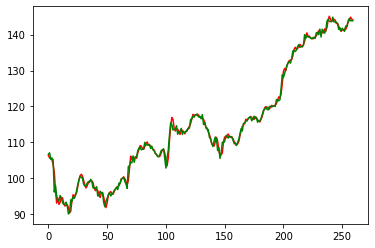

In [90]:
plt.plot(pred, color='r')
plt.plot(actual, color='g')

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [92]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [93]:
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae, mape:" + str((mse,rmse,mae,mape)))

mse, rmse, mae, mape:(0.9357349589088986, 0.9673339438419901, 0.6725596219003122, 0.6076850374232808)
